In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.grid": True,
    "axes.axisbelow": True
})


In [16]:
df = pd.read_csv("sef_series_summary_v2.csv")
df.head()


,station_source,variable,series_index,start,end,span_days,span_years,n_files,max_internal_gap_days,blocks
0,Aachen,ta,1,1891-01-01,2011-03-31,43919,120.25,1,0,1891-01-01..2011-03-31
1,AiPetri,ta,1,1895-09-12,2012-12-31,42845,117.31,1,0,1895-09-12..2012-12-31
2,Alkmaar,dd,1,1741-05-01,1748-11-30,2771,7.59,1,0,1741-05-01..1748-11-30
3,Alkmaar,rr,1,1741-05-01,1748-11-30,2771,7.59,1,0,1741-05-01..1748-11-30
4,Alkmaar,ta,1,1741-05-01,1748-11-30,2771,7.59,1,0,1741-05-01..1748-11-30


In [17]:
df["variable"].value_counts()

variable
ta     320
p      243
dd     106
rr      53
Tn      35
Tx      31
w       30
rh      17
eee      8
rrt      6
fs       1
Name: count, dtype: int64

In [18]:
# delete the vars I don't want to see more
df = df[~df["variable"].isin(["eee", "rrt", "fs"])]

bins = np.arange(0, df["span_years"].max() + 1, 1)  # yearly bins

bins_log = np.logspace(
    np.log10(df["span_years"].min()),
    np.log10(df["span_years"].max()),
    20
)

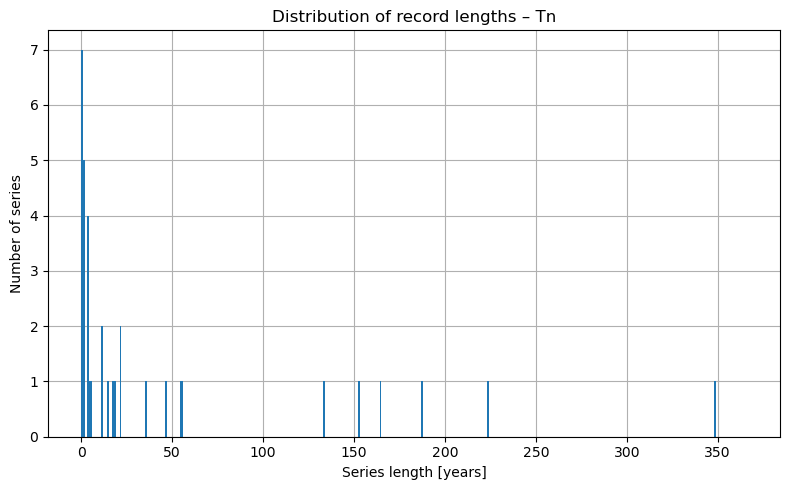

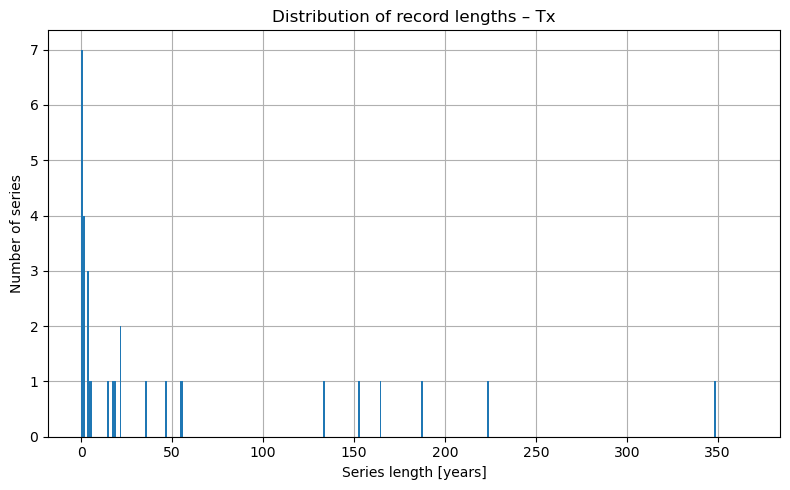

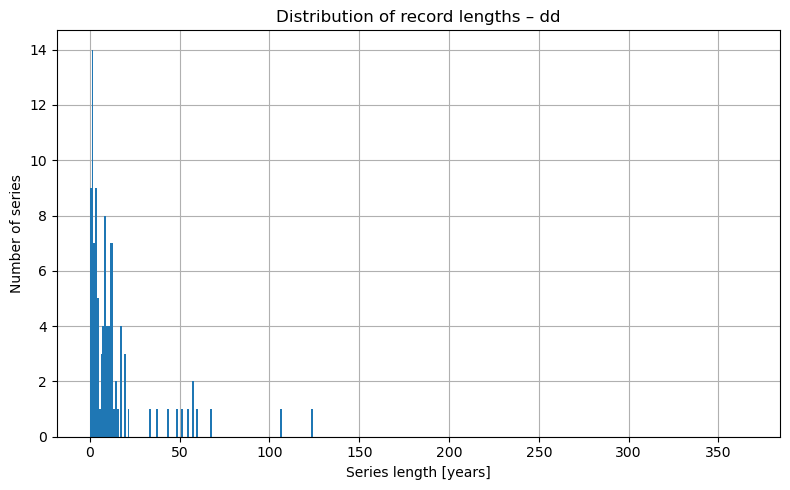

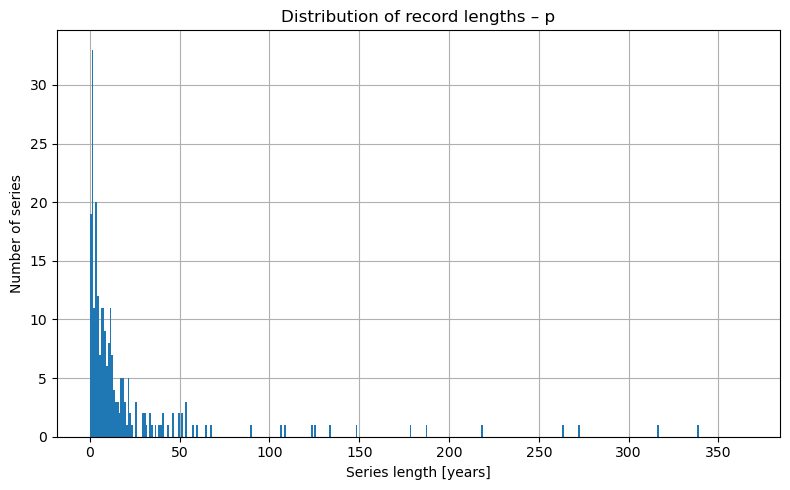

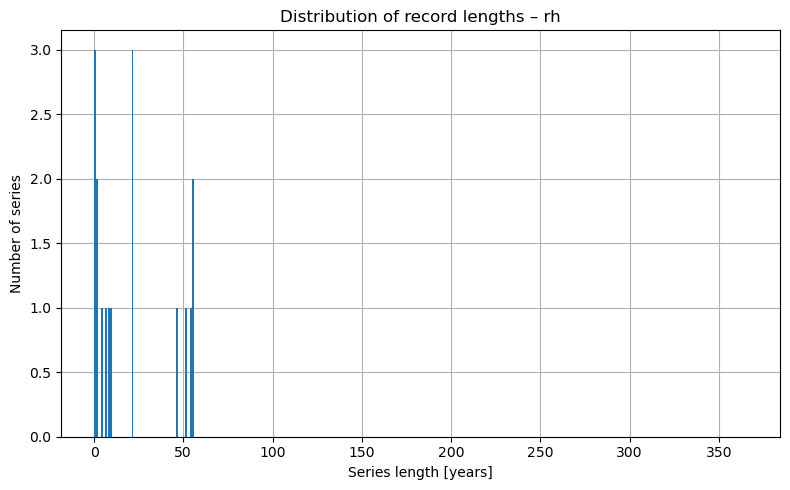

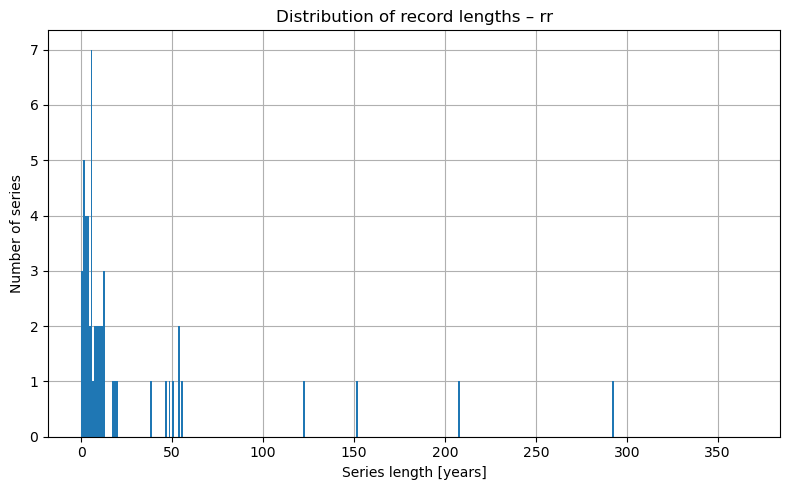

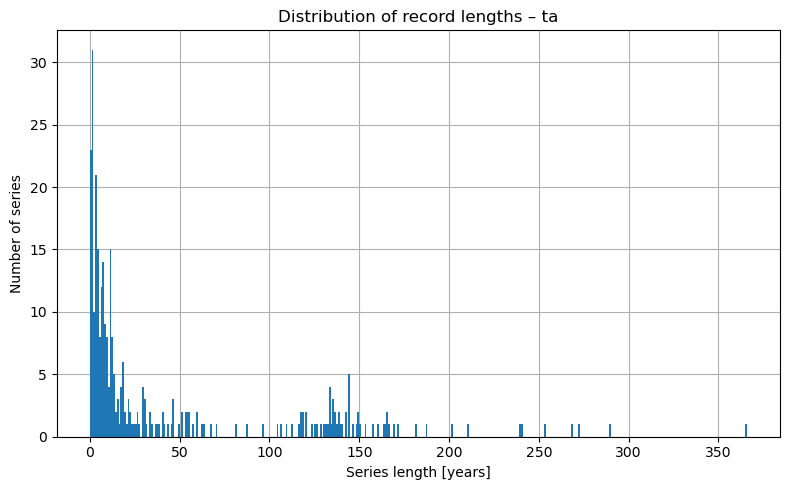

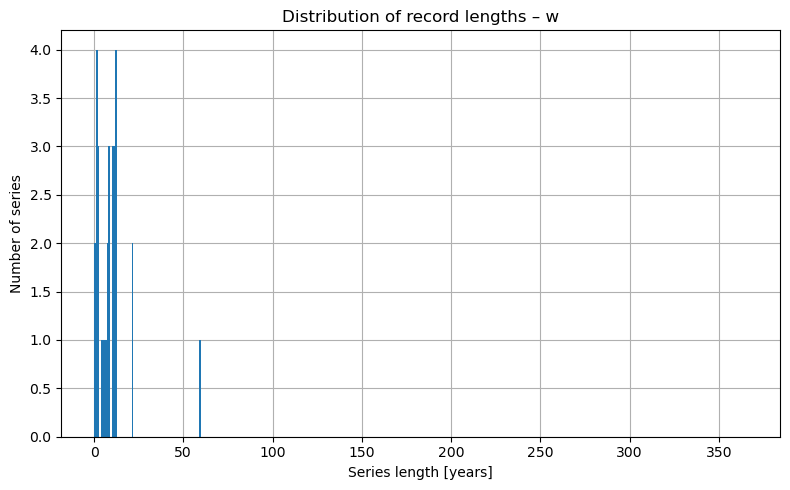

In [19]:
variables = sorted(df["variable"].unique())

for var in variables:
    sub = df[df["variable"] == var]

    plt.figure()
    plt.hist(sub["span_years"], bins=bins)

    plt.xlabel("Series length [years]")
    plt.ylabel("Number of series")
    plt.title(f"Distribution of record lengths – {var}")
    
    # Uncomment if using log bins
    # plt.xscale("log")

    plt.tight_layout()
    plt.show()


In [20]:
df2 = df.copy()
df["start_year"] = pd.to_numeric(df["start"].astype(str).str.slice(0, 4), errors="coerce")
df["end_year"]   = pd.to_numeric(df["end"].astype(str).str.slice(0, 4), errors="coerce")

# convert to int now that there are no NaNs
df["start_year"] = df["start_year"].astype(int)
df["end_year"]   = df["end_year"].astype(int)


In [ ]:
df["years"] = [np.arange(s, e + 1) for s, e in zip(df["start_year"], df["end_year"])]
df_years = df.explode("years").rename(columns={"years": "year"})


,start,end


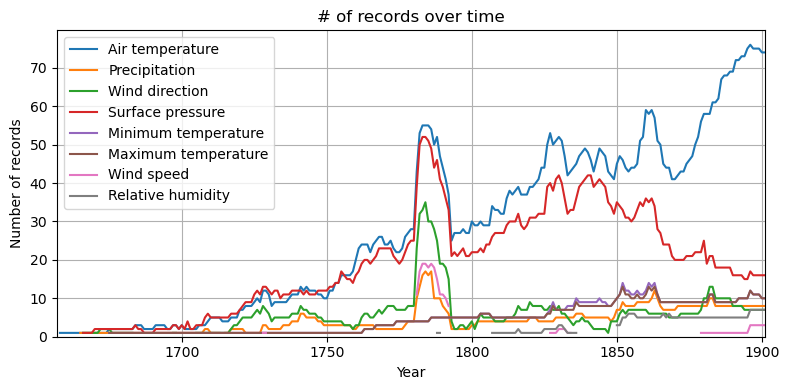

In [35]:
ts_by_var = (
    df_years
    .groupby(["year", "variable"])
    .size()
    .reset_index(name="n_records")
)

year_min = df_years["year"].min()
year_max = min(1901, df_years["year"].max())

all_years = pd.Index(range(year_min, year_max + 1), name="year")

var_map = {
    "ta": "Air temperature",
    "p":  "Surface pressure",
    "rr": "Precipitation",
    "dd": "Wind direction",
    "rh": "Relative humidity",
    "Tn": "Minimum temperature",
    "Tx": "Maximum temperature",
    "w": "Wind speed",
}


plt.figure(figsize=(8, 4))
for var in ts_by_var['variable'].unique():
    sub = (
        ts_by_var[ts_by_var['variable'] == var]
        .set_index('year')
        .reindex(all_years, fill_value=0)
        .reset_index()
    )
    # replace 0 with NaN to avoid overcrowding the plot
    y = sub['n_records'].replace(0, np.nan)

    plt.plot(sub['year'], y, label=var_map.get(var, var))
plt.xlabel("Year")
plt.xlim(df_years["start_year"].min()-1, 1901)
plt.ylim(0)
plt.ylabel("Number of records")
plt.title("# of records over time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
